# Dimension Reduce CovType



In [23]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import scipy
from sklearn import random_projection
from cluster_func import em
from cluster_func import kmeans

In [24]:
data_full = pd.read_csv('data/covtype.data.csv', header=None)

#Randomly sample the data to reduce the size of dataset due to computation difficulty
RandInd = np.random.choice(len(data_full),5000)
data = data_full.iloc[RandInd,:].reset_index().drop(['index'], axis = 1)

X = data.iloc[:,:-1].as_matrix()
y = data.iloc[:,-1].as_matrix() - 1

RandIndFull = np.random.choice(len(data_full), len(data_full))
data_f = data_full.iloc[RandIndFull,:].reset_index().drop(['index'], axis = 1)

X_f = data_f.iloc[:,:-1].as_matrix()
y_f = data_f.iloc[:,-1].as_matrix() - 1

#Splitting data into training and testing and keeping testing data aside
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [25]:
#X_train.shape[1]
X.shape

(5000, 54)

In [26]:
#######################################################################################################################
#######################################################################################################################
# Dimensionality reduction PCA


print("Starting FA")
print("Dimensionality reduction")

decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, min_samples_split = 5)
fa = FactorAnalysis(max_iter = 100)

pipe = Pipeline(steps=[('fa', fa), ('decisionTree', decisiontree)])

# Plot the PCA spectrum
fa.fit(X)

fig, ax = plt.subplots()
print(list(range(1,X.shape[1])),fa.noise_variance_)
ax.bar(list(range(1,55)), fa.noise_variance_, linewidth=2, color = 'blue')
plt.axis('tight')
plt.xlabel('n_components')
ax.set_ylabel('noise variance')

#Checking the accuracy for taking all combination of components
n_components = range(1, 55)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
gridSearch = GridSearchCV(pipe, dict(fa__n_components=n_components), cv = 3)
gridSearch.fit(X, y)
results = gridSearch.cv_results_
ax1 = ax.twinx()

#Plotting the accuracies and best component
ax1.plot(results['mean_test_score'], linewidth = 2, color = 'red')
ax1.set_ylabel('Mean Cross Validation Accuracy')
ax1.axvline(gridSearch.best_estimator_.named_steps['fa'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)

plt.legend(prop=dict(size=12))
plt.title('Accuracy/Noise Variance for FA (best n_components=  %d)'%gridSearch.best_estimator_.named_steps['fa'].n_components )
plt.show()

#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = gridSearch.best_estimator_.named_steps['fa'].n_components, max_iter = 100)
fa_new.fit(X_train)
X_train_transformed = fa_new.transform(X_train)
X_test_transformed = fa_new.transform(X_test)

Starting FA
Dimensionality reduction
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53] [9.99990122e-01 9.99999778e-01 9.96863128e-01 9.99999696e-01
 9.99997622e-01 9.99999965e-01 9.99235129e-01 9.99198900e-01
 9.99417343e-01 9.99999977e-01 7.91191222e-02 3.22679079e-02
 8.91103641e-02 2.16615307e-02 3.24686601e-03 1.05170023e-02
 7.96805625e-03 1.59050882e-02 3.11631866e-03 8.38416890e-03
 1.99214868e-04 1.98413078e-04 2.67825197e-03 3.07278596e-02
 1.86741199e-02 3.70246607e-02 2.25877577e-02 5.86870195e-04
 1.00000000e-12 5.15861108e-03 5.23279602e-03 4.07240898e-03
 6.67770882e-03 1.56718759e-02 1.37389651e-03 4.40602810e-02
 7.16025724e-02 3.35374563e-02 1.00000000e-12 3.90760923e-03
 1.74936783e-03 1.17482258e-03 9.45285343e-02 4.02705703e-02
 3.62683793e-02 6.03277551e-02 5.67020964e-02 2.89030279e-03
 4.03066220e-03 1.98768676e

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


In [27]:
###############################################################################################################################
#Reconstruction Error

print("Calculating Reconstruction Error")

def inverse_transform_fa(fa, X_transformed, X_train):

	return X_transformed.dot(fa.components_) + np.mean(X_train, axis = 0)

reconstruction_error = []

for comp in n_components:

	fa = FactorAnalysis(n_components = comp, max_iter = 100)
	X_transformed = fa.fit_transform(X_train)
	X_projected = inverse_transform_fa(fa, X_transformed, X_train)
	reconstruction_error.append(((X_train - X_projected) ** 2).mean())

	if(comp == gridSearch.best_estimator_.named_steps['fa'].n_components):
		chosen_error = ((X_train - X_projected) ** 2).mean()

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
ax2.axvline(gridSearch.best_estimator_.named_steps['fa'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for n_components chosen %f '%chosen_error)
plt.show()

Calculating Reconstruction Error


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


Clustering FA
Expected Maximization
Training accuracy for Expected Maximization for K = 7:  34.625
Testing accuracy for Expected Maximization for K = 7:  35.699999999999996
KMeans


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Training accuracy for KMeans for K = 7:  42.775
Testing accuracy for KMeans for K = 7:  42.5


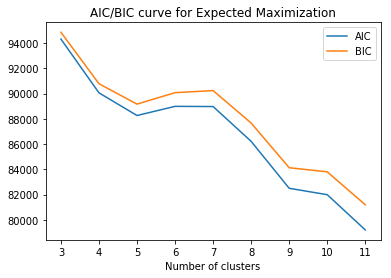

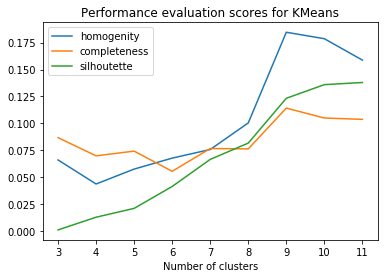

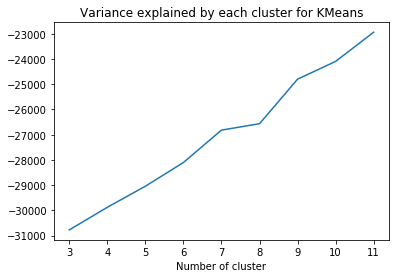

In [28]:
################################################################################################################################
#Clustering after dimensionality reduction

print("Clustering FA")

#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = gridSearch.best_estimator_.named_steps['fa'].n_components, max_iter = 100)
fa_new.fit(X_f)
X_transformed_f = fa_new.transform(X_f)


means_init = np.array([X_transformed_f[y_f == i].mean(axis=0) for i in range(7)])

#clustering experiments
print("Expected Maximization")
component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log = em(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 7, toshow = 0)

print("KMeans")
component_list, array_homo_2, array_comp_2, array_sil_2, array_var = kmeans(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 7, toshow = 0)

#Writing data to file
component_list = np.array(component_list).reshape(-1,1)
array_aic = np.array(array_aic).reshape(-1,1)
array_bic = np.array(array_bic).reshape(-1,1)
array_homo_1 = np.array(array_homo_1).reshape(-1,1)
array_comp_1 = np.array(array_comp_1).reshape(-1,1)
array_sil_1 = np.array(array_sil_1).reshape(-1,1)
array_avg_log = np.array(array_avg_log).reshape(-1,1)
array_homo_2 = np.array(array_homo_2).reshape(-1,1)
array_comp_2 = np.array(array_comp_2).reshape(-1,1)
array_sil_2 = np.array(array_sil_2).reshape(-1,1)
array_var = np.array(array_var).reshape(-1,1)

reconstruction_error = np.array(reconstruction_error).reshape(-1,1)

data_em_fa_covtype = np.concatenate((component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log), axis =1)

data_km_fa_covtype = np.concatenate((component_list, array_homo_2, array_sil_2, array_var), axis =1)

reconstruction_error_fa_covtype = np.concatenate((np.arange(1,55).reshape(-1,1), reconstruction_error), axis = 1)

file = './data/data_em_fa_covtype.csv'
with open(file, 'w', newline = '') as output:
	writer = csv.writer(output, delimiter=',')
	writer.writerows(data_em_fa_covtype)

file = './data/data_km_fa_covtype.csv'
with open(file, 'w', newline = '') as output:
	writer = csv.writer(output, delimiter=',')
	writer.writerows(data_km_fa_covtype)

file = './data/reconstruction_error_fa_covtype.csv'
with open(file, 'w', newline = '') as output:
	writer = csv.writer(output, delimiter=',')
	writer.writerows(reconstruction_error_fa_covtype)